Compression
=============

[computer file video](https://www.youtube.com/watch?v=Q2aEzeMDHMA)

In [1]:
import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib as mpl
%matplotlib inline
inline_rc = dict(mpl.rcParams)
import seaborn as sns
from pprint import pprint

from scipy.io import wavfile

sns.set_context("talk")
style = sns.axes_style('dark')
# pprint(style)
style['grid.color'] = 'green'
sns.set_style(style)

<open file u'/Users/aboyle/.virtualenvs/dsp/lib/python2.7/site-packages/matplotlib/mpl-data/sample_data/grace_hopper.png', mode 'rb' at 0x10ddf1f60>
(600, 512, 3) 1.0 0.0


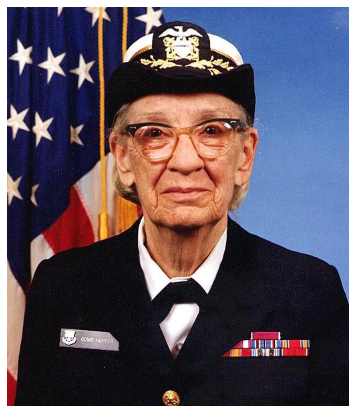

In [2]:
image_file = cbook.get_sample_data('grace_hopper.png')
print image_file
image = plt.imread(image_file)

print image.shape, np.amax(image), np.amin(image)

plt.imshow(image)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

(600, 512, 3) 255


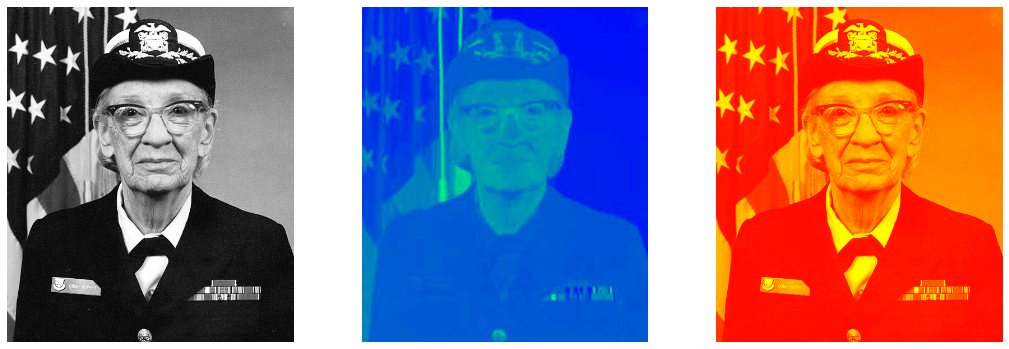

In [3]:
from PIL import Image
pimage = Image.open(image_file)
ycbcr = pimage.convert('YCbCr')
image_array = np.array(ycbcr)
print image_array.shape, np.amax(image_array)

fig = plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(image_array[:,:,0], cmap=plt.cm.Greys_r)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.subplot(1,3,2)
plt.imshow(image_array[:,:,1], cmap=plt.cm.winter_r)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.subplot(1,3,3)
plt.imshow(image_array[:,:,0], cmap=plt.cm.autumn)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.savefig('img/ycbcr.jpg', bbox_inches='tight', transparent=True)

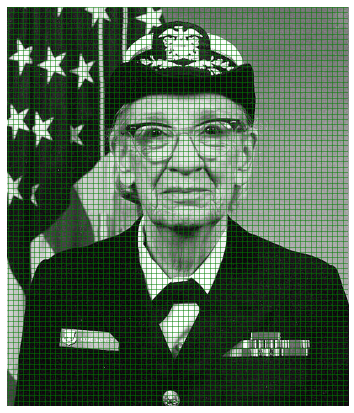

In [4]:
plt.imshow(image_array[:,:,0], cmap=plt.cm.Greys_r)
ax = plt.gca()

xlen = image_array.shape[1]
ylen = image_array.shape[0]
ax.set_xticks(range(0,xlen, 8))
ax.set_yticks(range(0,ylen, 8))
ax.grid(b=True, which='major', linewidth=0.5, axis='both')
ax.set_xticklabels('')
ax.set_yticklabels('')

fig = plt.gcf()
fig.savefig('img/gridface_image.jpg', bbox_inches='tight', transparent=True)

In [12]:
def annotate_grid(ax, data, txtcolor='black'):
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            value = data[row, col]
            ax.annotate(str(value), xy=(col,row), xytext=(col-0.25, row), fontsize=17, color=txtcolor)

(8, 8)


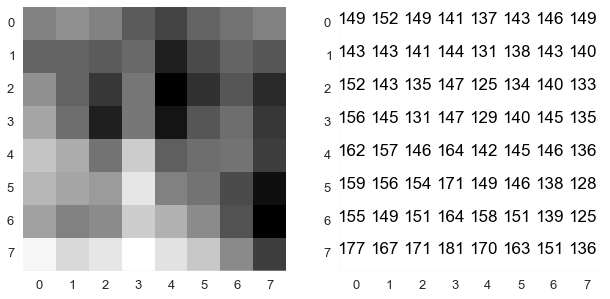

In [28]:
# grid_square = image_array[500:508, 440:448,0]
# grid_square = image_array[516:524, 408:416,0]
grid_square = image_array[160:168, 340:348,0]
print grid_square.shape

plt.subplot(1,2,1)
plt.imshow(grid_square, cmap=plt.cm.Greys_r, interpolation='none')

ax = plt.subplot(1,2,2)
blank = np.zeros_like(grid_square)
plt.imshow(blank, cmap=plt.cm.Greys, interpolation='none')
annotate_grid(ax, grid_square)

fig = plt.gcf()
fig.savefig('img/grid_square.png', bbox_inches='tight', transparent=True)

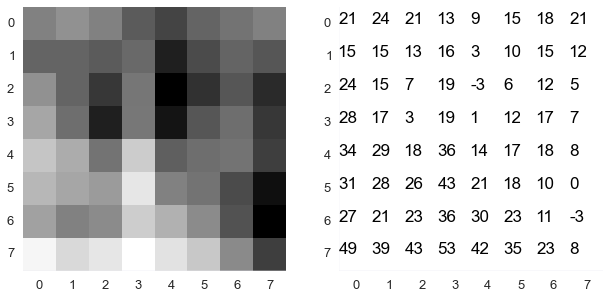

In [29]:
plt.subplot(1,2,1)
plt.imshow(grid_square, cmap=plt.cm.Greys_r, interpolation='none')

adjusted_grid = grid_square.astype(np.int16) - 128
ax = plt.subplot(1,2,2)
blank = np.zeros_like(grid_square)
plt.imshow(blank, cmap=plt.cm.Greys, interpolation='none')
annotate_grid(ax, adjusted_grid)

fig = plt.gcf()
fig.savefig('img/grid_square_adjusted.png', bbox_inches='tight', transparent=True)

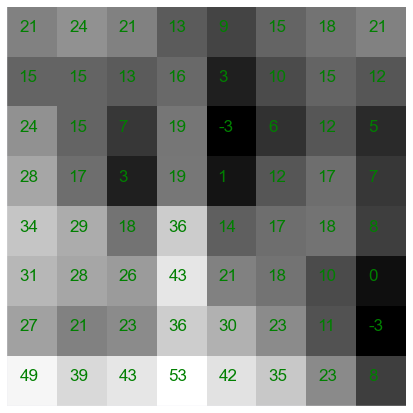

In [52]:

plt.imshow(grid_square, cmap=plt.cm.Greys_r, interpolation='none')
ax = plt.gca()
annotate_grid(ax, adjusted_grid, 'green')
ax.set_xticklabels('')
ax.set_yticklabels('')


fig = plt.gcf()
fig.savefig('img/numbered_grid.png', bbox_inches='tight', transparent=True)

In [7]:
shifted_grid = grid_square.astype(np.float) - 128
# print grid_square, shifted_grid.astype(np.int8)

from scipy.fftpack import dct

dct_coefficents = dct(dct(shifted_grid, axis=0), axis=1)

print dct_coefficents.astype(int)

[[ 4964  1015  -206   185   104   535  -180  -411]
 [-1077  -384   553  -186  -131   -54     6    -1]
 [  584   -12  -171   -42   -61  -144   117   165]
 [   71    10   -86   -87   -22   -97     4    10]
 [  517     4   134    39   -18   -19    -5     7]
 [ -367   -78    43    81    -1   -33    12    24]
 [  220   141     9   -51    14    29    11   -28]
 [    4    17     0     0     7    -6   -10     8]]


In [8]:
qtable = np.array([[16,  11,  10,  16,  24,   40,   51,   61],  
[12,  12,  14,  19,  26 ,  58 ,  60 ,  55 ,],  
[14,  13,  16,  24,  40 ,  57 ,  69 ,  56 ,],  
[14,  17,  22,  29,  51 ,  87 ,  80 ,  62 ,],  
[18,  22,  37,  56,  68 ,  109,  103,  77 ,],  
[24,  35,  55,  64,  81 ,  104,  113,  92 ,],  
[49,  64,  78,  87,  103,  121,  120,  101,],  
[72,  92,  95,  98,  112,  100,  103,  99 ,]])
shrunk = dct_coefficents/qtable
print shrunk.astype(int)

[[310  92 -20  11   4  13  -3  -6]
 [-89 -32  39  -9  -5   0   0   0]
 [ 41   0 -10  -1  -1  -2   1   2]
 [  5   0  -3  -3   0  -1   0   0]
 [ 28   0   3   0   0   0   0   0]
 [-15  -2   0   1   0   0   0   0]
 [  4   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


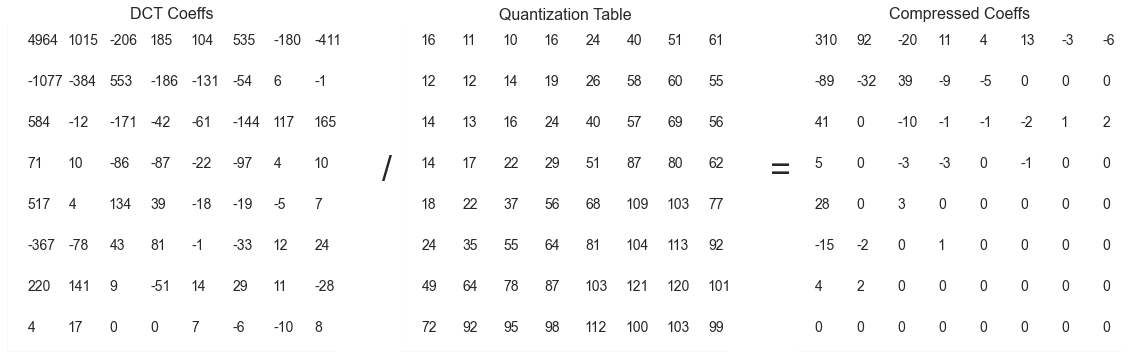

In [9]:
fig = plt.figure(figsize=(20,12))

ax = plt.subplot(1,3,1)
plt.imshow(blank, cmap=plt.cm.Greys, interpolation='none')
annotate_grid(ax, dct_coefficents.astype(int))
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.title('DCT Coeffs', fontsize=16)

ax = plt.subplot(1,3,2)
plt.imshow(blank, cmap=plt.cm.Greys, interpolation='none')
annotate_grid(ax, qtable)
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.ylabel('/', fontsize=36, rotation='horizontal')
plt.title('Quantization Table', fontsize=16)

ax = plt.subplot(1,3,3)
plt.imshow(blank, cmap=plt.cm.Greys, interpolation='none')
annotate_grid(ax, shrunk.astype(int))
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.ylabel('=', fontsize=36, rotation='horizontal')
plt.title("Compressed Coeffs", fontsize=16)

fig.savefig('img/dct_grid.png', bbox_inches='tight', transparent=True)

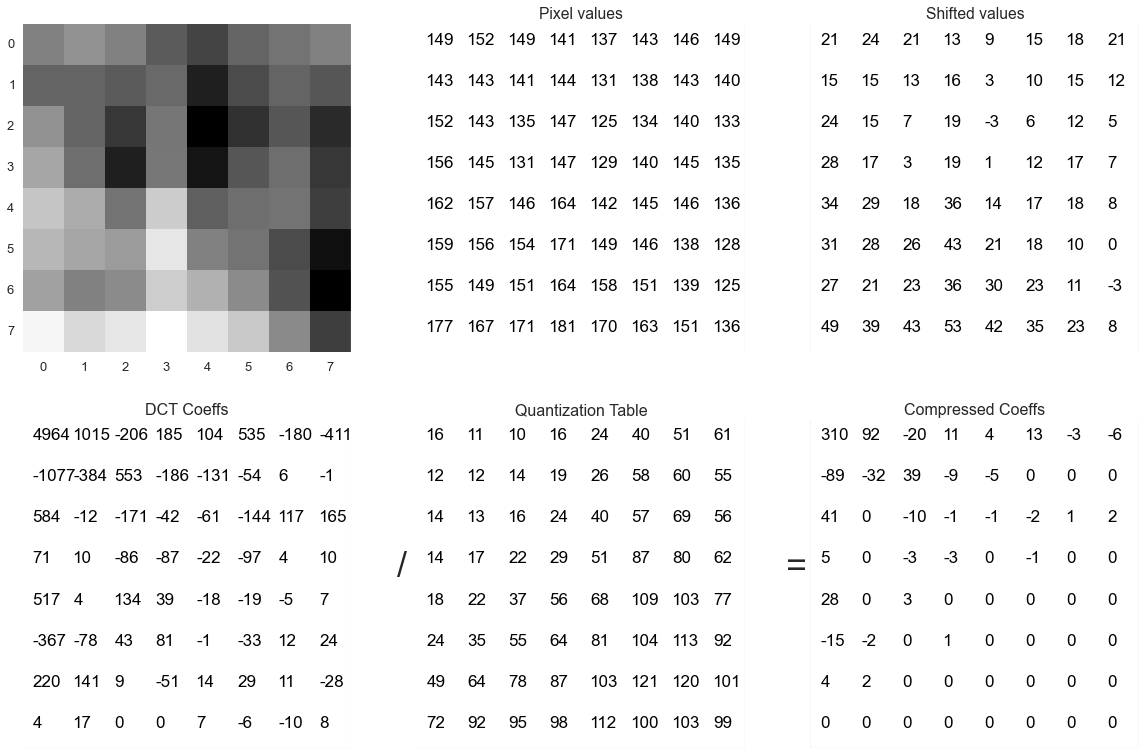

In [51]:
fig = plt.figure(figsize=(20,13))

plt.subplot(2,3,1)
plt.imshow(grid_square, cmap=plt.cm.Greys_r, interpolation='none')

ax = plt.subplot(2,3,2)
blank = np.zeros_like(grid_square)
plt.imshow(blank, cmap=plt.cm.Greys, interpolation='none')
annotate_grid(ax, grid_square)
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.title('Pixel values')

ax = plt.subplot(2,3,3)
blank = np.zeros_like(grid_square)
plt.imshow(blank, cmap=plt.cm.Greys, interpolation='none')
annotate_grid(ax, adjusted_grid)
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.title('Shifted values')

ax = plt.subplot(2,3,4)
plt.imshow(blank, cmap=plt.cm.Greys, interpolation='none')
annotate_grid(ax, dct_coefficents.astype(int))
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.title('DCT Coeffs', fontsize=16)

ax = plt.subplot(2,3,5)
plt.imshow(blank, cmap=plt.cm.Greys, interpolation='none')
annotate_grid(ax, qtable)
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.ylabel('/', fontsize=36, rotation='horizontal')
plt.title('Quantization Table', fontsize=16)

ax = plt.subplot(2,3,6)
plt.imshow(blank, cmap=plt.cm.Greys, interpolation='none')
annotate_grid(ax, shrunk.astype(int))
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.ylabel('=', fontsize=36, rotation='horizontal')
plt.title("Compressed Coeffs", fontsize=16)

fig.savefig('img/dct_overview.png', bbox_inches='tight', transparent=True)